# Pocket Export Analysis

Sadly the Pocket App is being decommissioned. I have saved a number of articles of the years and have tagged them into various vategories. Below is an analysis of my pocket exported data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.parse import urlparse

In [3]:
df = pd.read_csv("getPocket_export_part_000000.csv")
df.head()

,title,url,time_added,tags,status
0,http://norvig.com/spell-correct.html,http://norvig.com/spell-correct.html,1519674782,python,unread
1,https://betterexplained.com/articles/a-gentle-...,https://betterexplained.com/articles/a-gentle-...,1469403282,maths,unread
2,Code Like a Pythonista: Idiomatic Python,http://python.net/~goodger/projects/pycon/2007...,1450795275,python,unread
3,Richard Hamming: You and Your Research,http://paulgraham.com/hamming.html,1445348137,inspiration,unread
4,How Rainbow Tables work,http://kestas.kuliukas.com/RainbowTables/,1453822804,infosec,unread


In [4]:
df.shape

(694, 5)

In [5]:
df.drop_duplicates()

,title,url,time_added,tags,status
0,http://norvig.com/spell-correct.html,http://norvig.com/spell-correct.html,1519674782,python,unread
1,https://betterexplained.com/articles/a-gentle-...,https://betterexplained.com/articles/a-gentle-...,1469403282,maths,unread
2,Code Like a Pythonista: Idiomatic Python,http://python.net/~goodger/projects/pycon/2007...,1450795275,python,unread
3,Richard Hamming: You and Your Research,http://paulgraham.com/hamming.html,1445348137,inspiration,unread
4,How Rainbow Tables work,http://kestas.kuliukas.com/RainbowTables/,1453822804,infosec,unread
...,...,...,...,...,...
689,Pepsi lost the cola wars to Coke. Why is it st...,https://www.theguardian.com/food/article/2024/...,1743757267,business|non-fiction,unread
690,President Trump’s mindless tariffs will cause ...,https://www.economist.com/leaders/2025/04/03/p...,1743761124,economy,unread
691,10 Tips For Better Risk Management in Trading,https://www.newtraderu.com/2019/07/28/10-tips-...,1744444003,finance,unread
692,Scientists Are Mapping the Boundaries of What ...,https://www.wired.com/story/next-level-chaos-t...,1745242358,non-fiction|science,unread


In [6]:
# Check duplicate URL entries
df.loc[df.duplicated(subset=['url'])]

,title,url,time_added,tags,status


In [7]:
df.dtypes

title         object
url           object
time_added     int64
tags          object
status        object
dtype: object

### Analysis by timeline

In [8]:
# Convert the time series from Unix epoch time to pandas date time
df["date_added"] = pd.to_datetime(df["time_added"], unit='s')
df.head()

,title,url,time_added,tags,status,date_added
0,http://norvig.com/spell-correct.html,http://norvig.com/spell-correct.html,1519674782,python,unread,2018-02-26 19:53:02
1,https://betterexplained.com/articles/a-gentle-...,https://betterexplained.com/articles/a-gentle-...,1469403282,maths,unread,2016-07-24 23:34:42
2,Code Like a Pythonista: Idiomatic Python,http://python.net/~goodger/projects/pycon/2007...,1450795275,python,unread,2015-12-22 14:41:15
3,Richard Hamming: You and Your Research,http://paulgraham.com/hamming.html,1445348137,inspiration,unread,2015-10-20 13:35:37
4,How Rainbow Tables work,http://kestas.kuliukas.com/RainbowTables/,1453822804,infosec,unread,2016-01-26 15:40:04


In [9]:
# Extract the year for trend analysis
df["year_added"] = df["date_added"].dt.year
df.tail()

,title,url,time_added,tags,status,date_added,year_added
689,Pepsi lost the cola wars to Coke. Why is it st...,https://www.theguardian.com/food/article/2024/...,1743757267,business|non-fiction,unread,2025-04-04 09:01:07,2025
690,President Trump’s mindless tariffs will cause ...,https://www.economist.com/leaders/2025/04/03/p...,1743761124,economy,unread,2025-04-04 10:05:24,2025
691,10 Tips For Better Risk Management in Trading,https://www.newtraderu.com/2019/07/28/10-tips-...,1744444003,finance,unread,2025-04-12 07:46:43,2025
692,Scientists Are Mapping the Boundaries of What ...,https://www.wired.com/story/next-level-chaos-t...,1745242358,non-fiction|science,unread,2025-04-21 13:32:38,2025
693,https://reprint.forrester.com/reports/your-bol...,https://reprint.forrester.com/reports/your-bol...,1747297440,erp|tech,unread,2025-05-15 08:24:00,2025


In [10]:
df.dtypes

title                 object
url                   object
time_added             int64
tags                  object
status                object
date_added    datetime64[ns]
year_added             int32
dtype: object

In [11]:
# Extract the number of urls listed each year
yearly_counts = df["year_added"].value_counts()
yearly_counts

year_added
2016    180
2015    151
2023     70
2018     60
2019     44
2020     42
2022     41
2017     40
2021     26
2024     24
2025     13
2014      2
2013      1
Name: count, dtype: int64

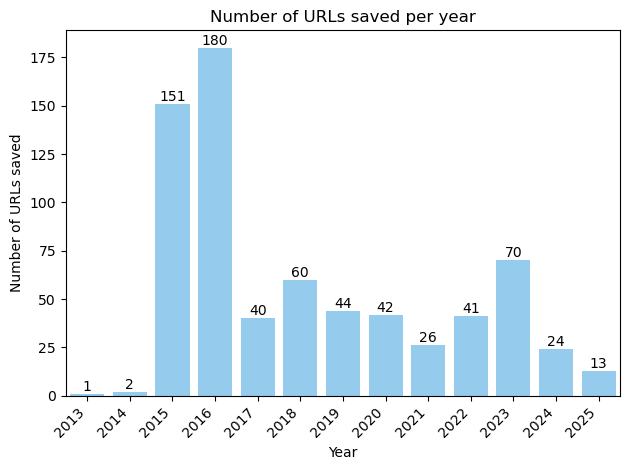

In [12]:
# Visualize the yearly distribution of urls

barplot = sns.barplot(x = yearly_counts.index,
                      y = yearly_counts.values,
                      #palette = "coolwarm",
                      #palette = "mako",
                      #hue = yearly_counts.index,
                      color = "lightskyblue",
                      legend = False
                     )

plt.bar_label(barplot.containers[0], fontsize=10)

plt.title("Number of URLs saved per year")
plt.xlabel("Year")
plt.ylabel("Number of URLs saved")
plt.xticks(rotation = 45, ha = "right")

plt.tight_layout()

plt.show()

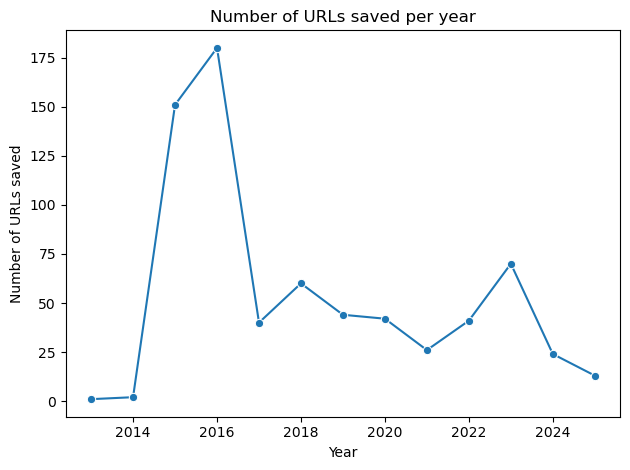

In [16]:
lineplot = sns.lineplot(x = yearly_counts.index,
                        y = yearly_counts.values,
                        marker = "o"
                       )

plt.title("Number of URLs saved per year")
plt.xlabel("Year")
plt.ylabel("Number of URLs saved")
#plt.xticks(rotation = 45, ha = "right")

plt.tight_layout()

plt.show()

In [17]:
# Analyse in which day of the week was more active in saving urls
df["day_name"] = df["date_added"].dt.day_name()
df.head()

,title,url,time_added,tags,status,date_added,year_added,day_name
0,http://norvig.com/spell-correct.html,http://norvig.com/spell-correct.html,1519674782,python,unread,2018-02-26 19:53:02,2018,Monday
1,https://betterexplained.com/articles/a-gentle-...,https://betterexplained.com/articles/a-gentle-...,1469403282,maths,unread,2016-07-24 23:34:42,2016,Sunday
2,Code Like a Pythonista: Idiomatic Python,http://python.net/~goodger/projects/pycon/2007...,1450795275,python,unread,2015-12-22 14:41:15,2015,Tuesday
3,Richard Hamming: You and Your Research,http://paulgraham.com/hamming.html,1445348137,inspiration,unread,2015-10-20 13:35:37,2015,Tuesday
4,How Rainbow Tables work,http://kestas.kuliukas.com/RainbowTables/,1453822804,infosec,unread,2016-01-26 15:40:04,2016,Tuesday


In [18]:
# Extract the number of urls listed each year
day_counts = df["day_name"].value_counts()
day_counts

day_name
Thursday     147
Monday       114
Wednesday    110
Tuesday      109
Sunday        85
Friday        81
Saturday      48
Name: count, dtype: int64

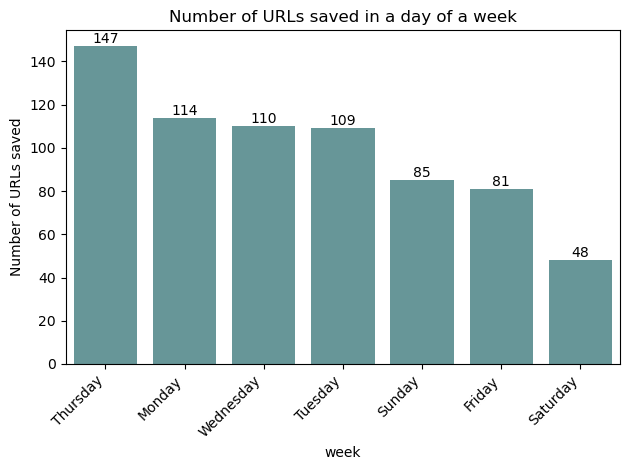

In [19]:
# Visualize the yearly distribution of urls

dayplot = sns.barplot(x = day_counts.index,
                      y = day_counts.values,
                      #palette = "coolwarm",
                      #palette = "mako",
                      #hue = day_counts.index,
                      color = "cadetblue",
                      legend = False
                     )

plt.bar_label(dayplot.containers[0], fontsize=10)

plt.title("Number of URLs saved in a day of a week")
plt.xlabel("week")
plt.ylabel("Number of URLs saved")
plt.xticks(rotation = 45, ha = "right")

plt.tight_layout()

plt.show()

### URL Domain Analysis

In [20]:
# Extract the domain from URL for analysis
df["domain"] = df["url"].apply(lambda x: urlparse(x).netloc.replace("www.", ""))
df.head()

,title,url,time_added,tags,status,date_added,year_added,day_name,domain
0,http://norvig.com/spell-correct.html,http://norvig.com/spell-correct.html,1519674782,python,unread,2018-02-26 19:53:02,2018,Monday,norvig.com
1,https://betterexplained.com/articles/a-gentle-...,https://betterexplained.com/articles/a-gentle-...,1469403282,maths,unread,2016-07-24 23:34:42,2016,Sunday,betterexplained.com
2,Code Like a Pythonista: Idiomatic Python,http://python.net/~goodger/projects/pycon/2007...,1450795275,python,unread,2015-12-22 14:41:15,2015,Tuesday,python.net
3,Richard Hamming: You and Your Research,http://paulgraham.com/hamming.html,1445348137,inspiration,unread,2015-10-20 13:35:37,2015,Tuesday,paulgraham.com
4,How Rainbow Tables work,http://kestas.kuliukas.com/RainbowTables/,1453822804,infosec,unread,2016-01-26 15:40:04,2016,Tuesday,kestas.kuliukas.com


In [21]:
len(df["domain"].unique())

366

In [22]:
top_domains = df["domain"].value_counts().head(15)
top_domains

domain
mckinsey.com                  48
hbr.org                       35
automatetheboringstuff.com    28
medium.com                    23
flip.it                       18
code.tutsplus.com             15
troyhunt.com                  11
towardsdatascience.com         9
twilio.com                     8
analyticsvidhya.com            8
howtogeek.com                  7
impythonist.wordpress.com      7
cloud.google.com               6
lifehacker.com                 5
theatlantic.com                5
Name: count, dtype: int64

In [23]:
top_domains.dtype

dtype('int64')

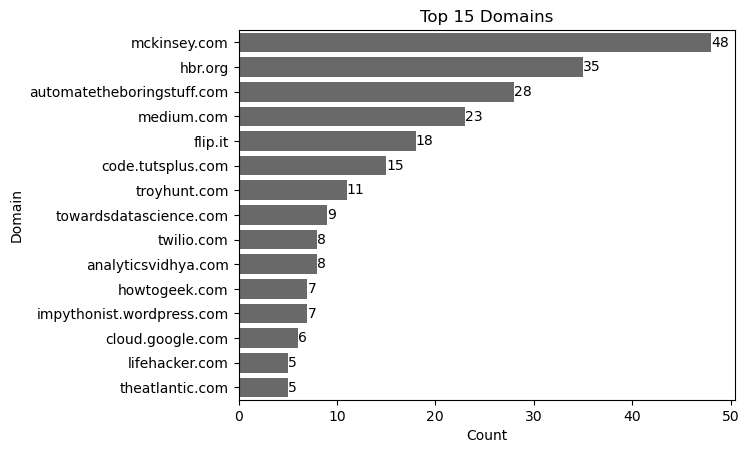

In [24]:
# Domain visualization

barplot = sns.barplot(x = top_domains.values,
                      y = top_domains.index,
                      #palette = "mako",
                      #palette = "magma",
                      #palette = "coolwarm",
                      #palette = "Blues_d",
                      #hue = top_domains.index,
                      color = "dimgrey",
                      legend = False
                     )

#fig.set_title("Top 15 Domains")
#fig.set_xlabel("Count")
#fig.set_ylabel("Domain")

plt.bar_label(barplot.containers[0], fontsize=10)
plt.title("Top 15 Domains")
plt.xlabel("Count")
plt.ylabel("Domain")

#plt.tight_layout()

plt.show()


In [25]:
# Explore links from interesting domains
df.loc[df["domain"] == "troyhunt.com"]

,title,url,time_added,tags,status,date_added,year_added,day_name,domain
18,Troy Hunt: OWASP Top 10 for .NET developers pa...,http://www.troyhunt.com/2010/05/owasp-top-10-f...,1453826517,infosec,unread,2016-01-26 16:41:57,2016,Tuesday,troyhunt.com
19,Troy Hunt: OWASP Top 10 for .NET developers pa...,http://www.troyhunt.com/2010/05/owasp-top-10-f...,1453826530,infosec,unread,2016-01-26 16:42:10,2016,Tuesday,troyhunt.com
21,Troy Hunt: OWASP Top 10 for .NET developers pa...,http://www.troyhunt.com/2010/07/owasp-top-10-f...,1453826539,infosec,unread,2016-01-26 16:42:19,2016,Tuesday,troyhunt.com
27,Troy Hunt: OWASP Top 10 for .NET developers pa...,http://www.troyhunt.com/2010/11/owasp-top-10-f...,1453826549,infosec,unread,2016-01-26 16:42:29,2016,Tuesday,troyhunt.com
29,Troy Hunt: OWASP Top 10 for .NET developers pa...,http://www.troyhunt.com/2010/12/owasp-top-10-f...,1453826567,infosec,unread,2016-01-26 16:42:47,2016,Tuesday,troyhunt.com
35,Troy Hunt: OWASP Top 10 for .NET developers pa...,http://www.troyhunt.com/2010/09/owasp-top-10-f...,1453826559,infosec,unread,2016-01-26 16:42:39,2016,Tuesday,troyhunt.com
36,Troy Hunt: OWASP Top 10 for .NET developers pa...,http://www.troyhunt.com/2011/06/owasp-top-10-f...,1453826577,infosec,unread,2016-01-26 16:42:57,2016,Tuesday,troyhunt.com
37,Troy Hunt: OWASP Top 10 for .NET developers pa...,http://www.troyhunt.com/2011/08/owasp-top-10-f...,1453826586,infosec,unread,2016-01-26 16:43:06,2016,Tuesday,troyhunt.com
44,Troy Hunt: OWASP Top 10 for .NET developers pa...,http://www.troyhunt.com/2011/11/owasp-top-10-f...,1453826595,infosec,unread,2016-01-26 16:43:15,2016,Tuesday,troyhunt.com
46,Troy Hunt: OWASP Top 10 for .NET developers pa...,http://www.troyhunt.com/2011/12/owasp-top-10-f...,1453826604,infosec,unread,2016-01-26 16:43:24,2016,Tuesday,troyhunt.com


### Tag Analysis

In [26]:
top_tags = df["tags"].fillna("untagged").str.strip().str.split("|").explode().value_counts().head(15)
top_tags

tags
python              287
non-fiction          80
business             73
machine learning     61
tech                 44
pandas               38
raspberry pi         25
strategy             25
android              22
infosec              15
digital              14
sales                14
cloud                13
git                  13
career               13
Name: count, dtype: int64

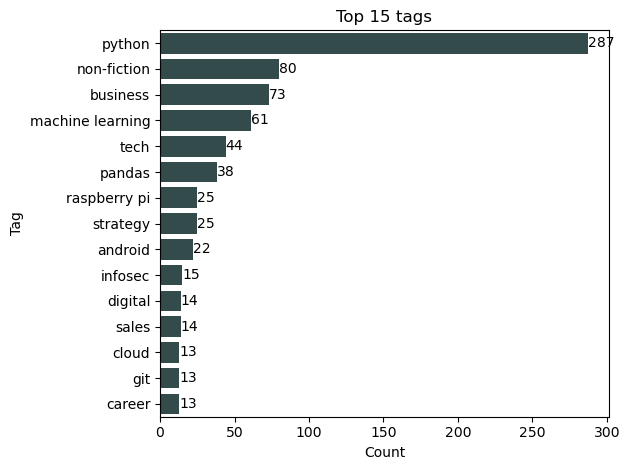

In [27]:
# Domain visualization

tagplot = sns.barplot(x = top_tags.values,
                      y = top_tags.index,
                      #palette = "mako",
                      #palette = "magma",
                      #palette = "coolwarm"
                      #hue = top_tags.index,
                      color = "darkslategrey",
                      legend = False
                     )

#fig.bar_label(fig.containers[0], fontsize = 10)

#fig.set_title("Top 15 Domains")
#fig.set_xlabel("Count")
#fig.set_ylabel("Domain")

plt.bar_label(tagplot.containers[0], fontsize=10)
plt.title("Top 15 tags")
plt.xlabel("Count")
plt.ylabel("Tag")

plt.tight_layout()

plt.show()


### Trend Analysis of domains saved per year

In [28]:
df_yearly_domains = df[df["domain"].isin(top_domains.index)].pivot_table(index = "domain",
                                                     columns = "year_added",
                                                     values = "url",
                                                     dropna = True,
                                                     fill_value = 0,
                                                     aggfunc = "count",
                                                    )

df_yearly_domains

year_added,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
domain,,,,,,,,,,,
analyticsvidhya.com,0,2,0,6,0,0,0,0,0,0,0
automatetheboringstuff.com,28,0,0,0,0,0,0,0,0,0,0
cloud.google.com,0,0,0,0,0,0,6,0,0,0,0
code.tutsplus.com,15,0,0,0,0,0,0,0,0,0,0
flip.it,7,8,2,0,0,0,0,0,1,0,0
hbr.org,0,0,0,0,0,11,0,11,12,1,0
howtogeek.com,0,7,0,0,0,0,0,0,0,0,0
impythonist.wordpress.com,6,1,0,0,0,0,0,0,0,0,0
lifehacker.com,3,0,2,0,0,0,0,0,0,0,0


In [29]:
df_yearly_domains.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, analyticsvidhya.com to twilio.com
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2015    15 non-null     int64
 1   2016    15 non-null     int64
 2   2017    15 non-null     int64
 3   2018    15 non-null     int64
 4   2019    15 non-null     int64
 5   2020    15 non-null     int64
 6   2021    15 non-null     int64
 7   2022    15 non-null     int64
 8   2023    15 non-null     int64
 9   2024    15 non-null     int64
 10  2025    15 non-null     int64
dtypes: int64(11)
memory usage: 1.4+ KB


In [30]:
df_yearly_domains.columns

Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype='int32', name='year_added')

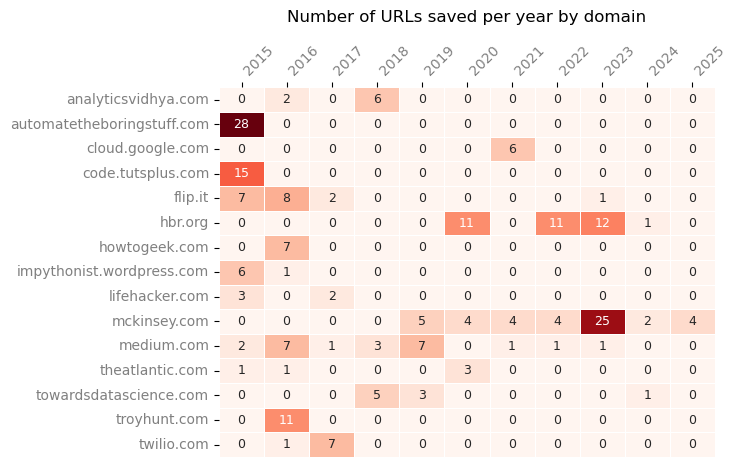

In [31]:
heatmap = sns.heatmap(df_yearly_domains,
                      linewidth = .5,
                      annot = True,
                      annot_kws = {"size":9},
                      #robust = True, # Set cell color ignoring outliers,
                      cbar = False, # Hide colorbars
                      cmap = "Reds",
                     )

heatmap.set(xlabel = "",
            ylabel = "",
           )

heatmap.xaxis.tick_top() # Push x labels to the top

plt.xticks(rotation = 45, ha = "left", size = 10, color ="grey")
plt.yticks(size = 10, color = "grey")

plt.title("Number of URLs saved per year by domain", pad = 15, color = "black", size = 12)

plt.show()